# Applied Statistics Project

**Linda Grealish**

***

## Table of Contents

* [Project Specification](#project_spec)
 * [Description of Plant Growth dataset](#desc_dataset)

   * [Visualising the dataset](#visualise_dataset)
 * [$t$-Test](#ttest)
 
    * [What is a $t$-Test](#desc_ttest)
    * [How a $t$-test works](#ttest_works)
    * [Assumptions](#assumptions)
    * [$t$-test analysis and results](#ttest_results)
 * [ANOVA](#anova)
 * [ANOVA vs multiple $t$-test](#anova_v_ttest)

***

## Project Specification

In this project, you will analyze the [PlantGrowth R dataset](https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv).
You will find [a short description](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html) of it on [Vicent Arel-Bundock's Rdatasets page](https://vincentarelbundock.github.io/Rdatasets/).
The dataset contains two main variables, a treatment group and the weight of plants within those groups.

Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work.
In doing this you should:

1. Download and save the dataset to your repository.

2. Describe the data set in your notebook.

3. Describe what a t-test is, how it works, and what the assumptions are.

3. Perform a t-test to determine whether there is a significant difference between the two treatment groups `trt1` and `trt2`.

4. Perform ANOVA to determine whether there is a significant difference between the three treatment groups `ctrl`, `trt1`, and `trt2`.

5. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

<a id="desc_dataset"></a>
## Description of Plant Growth dataset

In [9]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [12]:
# Define dataframe from plantgrowth.csv file

df = pd.read_csv('plantgrowth.csv')

df.head()

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [18]:
# Drop column 'rownames' as they are labels
df.drop(columns=['rownames'], inplace=True)

df.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


In [19]:
df.describe()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


In [27]:
# Define the groups within the dataset - ctrl, trt1, trt2
ctrl = df[df['group'] == 'ctrl']['weight']
trt1 = df[df['group'] == 'trt1']['weight']
trt2 = df[df['group'] == 'trt2']['weight']

<a id="visualise_dataset"></a>
### Visualising the dataset

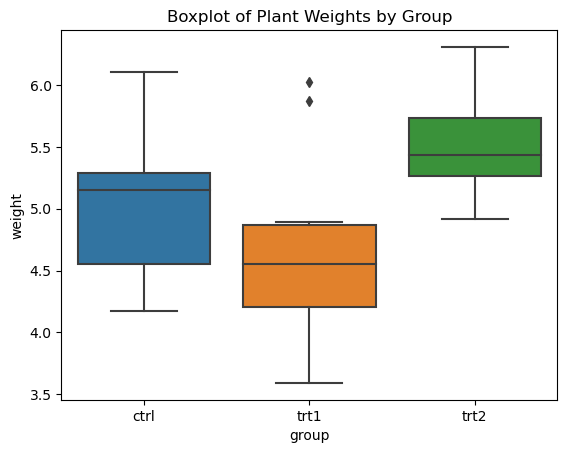

In [28]:
sns.boxplot(x='group', y='weight', data=df)
plt.title("Boxplot of Plant Weights by Group")
plt.show()

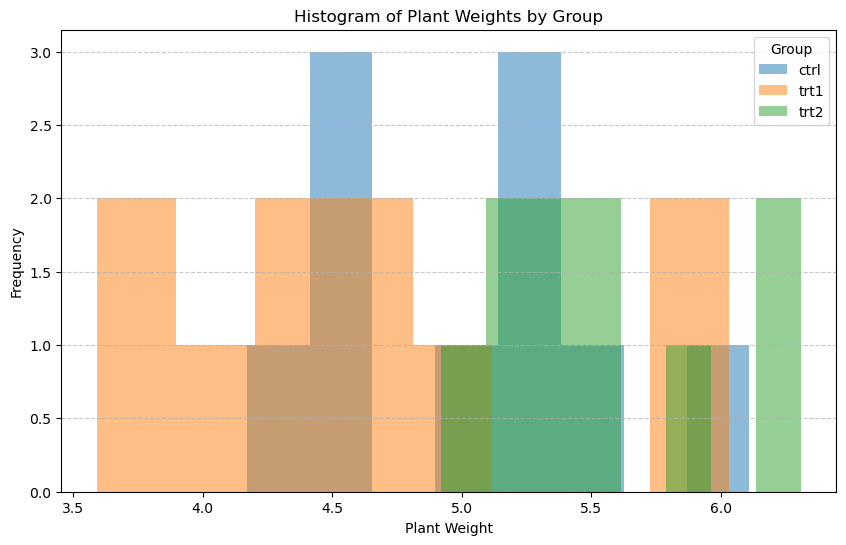

In [29]:
# Plot histograms for each group
groups = df['group'].unique()
plt.figure(figsize=(10, 6))

for group in groups:
    group_df = df[df['group'] == group]['weight']
    plt.hist(group_df, bins=8, alpha=0.5, label=group)

# Add labels, legend, and title
plt.xlabel('Plant Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Plant Weights by Group')
plt.legend(title='Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

<a id="ttest"></a>
# $t$-Tests

<a id="desc_ttest"></a>
### What is a $t$-test